<a href="https://colab.research.google.com/github/Wo-oJin/2022F-Ajou-ML/blob/main/HW3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [1]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd

In [4]:
%cd ./drive/MyDrive/Colab Notebooks/HW3
df = pd.read_csv('airline_sampled2.csv') 
# HW1에서 사용한 데이터를 샘플링한 파일이므로 꼭 제공된 csv 파일을 사용할 것

/content/drive/MyDrive/Colab Notebooks/HW3


In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,8827,8858,0,1,27,1,2,183,4,4,...,5,4,3,4,3,4,5,0,7.0,0
1,3588,3601,1,0,22,1,0,829,2,3,...,1,1,3,3,3,3,1,4,4.0,0
2,1011,1017,0,0,23,1,2,1020,4,5,...,4,3,4,5,3,5,4,0,0.0,1
3,7212,7237,1,0,21,1,0,1028,4,4,...,3,3,3,2,5,4,3,0,0.0,1
4,5025,5044,1,1,67,0,0,626,3,4,...,2,2,3,2,5,2,3,0,0.0,0


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis=1) # dataframe
y = df['satisfaction'] #series
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (800, 24)
y_train's shape :  (800,)

X_val's shape :  (100, 24)
y_val's shape :  (100,)

X_test's shape :  (100, 24)
y_test's shape :  (100,)


## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

test accuracy: 0.69
max_k = 80


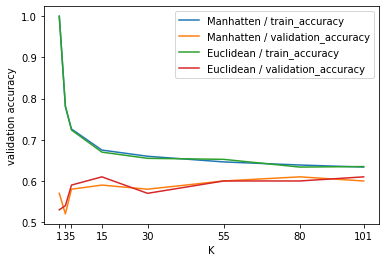

In [12]:
### 문제 1 ###
### 코드 작성 ###
K = [1, 3, 5, 15, 30, 55, 80, 101]
max_validation = 0
max_k = 1

for i in [1,2]: # 1: 맨해튼 거리 척도, 2: 유클리디안 거리 척도
  train_acc = []
  validation_acc = []

  for j in K:
    classifier = KNeighborsClassifier(n_neighbors = j, p = i, metric = 'minkowski')
    classifier.fit(X_train, y_train) # 훈련데이터로 충분히 학습시킨다

    #각 K에서의 train/validation 데이터를 저장한다
    train_acc.append(classifier.score(X_train, y_train))

    validation_score = classifier.score(X_val, y_val)
    if(max_validation < validation_score): # 가장 높은 K 값을 저장하기 위한 비교
      max_validation = validation_score
      max_k = j

    validation_acc.append(classifier.score(X_val, y_val))
  
  # Manhatten, Euclidean 거리 척도별로 그래프를 그려준다
  if(i == 1): # Manhatten
    plt.plot(K, train_acc, label = 'Manhatten / train_accuracy')
    plt.plot(K, validation_acc, label='Manhatten / validation_accuracy')
  else: # Euclidean
    plt.plot(K, train_acc, label = 'Euclidean / train_accuracy')
    plt.plot(K, validation_acc, label='Euclidean / validation_accuracy')

  # 그래프 공통 속성
  plt.xlabel('K')
  plt.ylabel('validation accuracy')
  plt.legend()
  plt.xticks(K)

classifier = KNeighborsClassifier(n_neighbors = 55, p = 1, metric = 'minkowski')
classifier.fit(X_train, y_train) # 훈련데이터로 충분히 학습시킨다
test_accuracy = classifier.score(X_test, y_test)

print(f"test accuracy: {test_accuracy}")
print(f"max_k = {max_k}")

**설명 작성**  
- 최적의 파라미터: K = 80(Manhatten)
- 설명: validation accuracy만 살펴봤을 땐, 맨해튼 거리와 유클리디안 거리 모두 k=80일 때 높은 편에 속한다. 또한 k=80를 기점으로 train_accuracy 및 validation_accuracy가 지속적으로 감소 및 증가하는 추세를 보이는데 이 추세가 급격한 것이 아닌 완만한 편이라 overfitting 및 underfitting의 위험성도 없다고 판단했다. 

 결론적으로, validation_accuracy가 가장 높으며 train, validation accuracy가 k=80을 전후로 완만한 변화율을 보이고 있기 때문에 k=80를 최적의 파라미터로 설정했다.

 또한 거리 척도는 k=80일 때 가장 높은 validation accuracy를 보이는 맨해튼 거리를 택했다.

 test accuracy: 69%

---

## 문제2 Random Forest


- Scikit-learn 라이브러리를 이용하여 Random Forest의 최적의 파라미터를 찾는다.
    - Criterion 중 최소 두개를 비교한다.
    - 최적의 파라미터 max depth 값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 max depth 값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [13]:
from sklearn.ensemble import RandomForestClassifier

test accuracy = 0.87


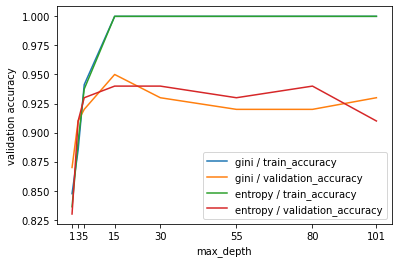

In [16]:
### 문제 2 ###
### 코드 작성 ###
from sklearn.metrics import accuracy_score

max_depths = [1, 3, 5, 15, 30, 55, 80, 101]
criterion = ['gini', 'entropy']

for ct in criterion: # criterion 별로 비교하기 위해서
  train_acc = []
  validation_acc = []
  
  for depth in max_depths: # 각 depth마다의 성능을 측정하기 위해서
    rf = RandomForestClassifier(criterion = ct, max_depth=depth)
    rf.fit(X_train, y_train) # 훈련 데이터로 충분히 학습시킨다

    pred = rf.predict(X_val) # 예측값
    accuracy = accuracy_score(y_val,pred) # validation 정확도 

    train_acc.append(accuracy_score(y_train,rf.predict(X_train)))
    validation_acc.append(accuracy_score(y_val,rf.predict(X_val)))


  # gini와 entropy를 구분하여 그림
  if(ct == 'gini'): 
      plt.plot(max_depths, train_acc, label = 'gini / train_accuracy')
      plt.plot(max_depths, validation_acc, label='gini / validation_accuracy')
  else:
      plt.plot(max_depths, train_acc, label = 'entropy / train_accuracy')
      plt.plot(max_depths, validation_acc, label='entropy / validation_accuracy')

  # 그래프 공통 속성
  plt.xlabel('max_depth')
  plt.ylabel('validation accuracy')
  plt.legend()
  plt.xticks(max_depths)

rf = RandomForestClassifier(criterion = "gini", max_depth=15)
rf.fit(X_train, y_train) # test data로 학습

predict = rf.predict(X_test)
accuracy = accuracy_score(y_test,predict)
print(f"test accuracy = {accuracy}")

**설명 작성**  
- 최적의 파라미터: max_depth = 15(gini)
- 설명: train accuracy가 max_depth = 15 이상부터 제일 높은 값으로 일정하게 유지되고, validation accuracy 또한 gini/entropy 모두 max_depth = 15일 때 가장 크다. 또한 max_depth = 15를 기준으로 정확도의 변화도 앞 뒤로 크게 차이나지 않기 때문에 overfitting/underfitting 되어있지 않다 판단했다.

test accuracy : 87%

---

## 문제3 Cross validation with Linear SVM
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

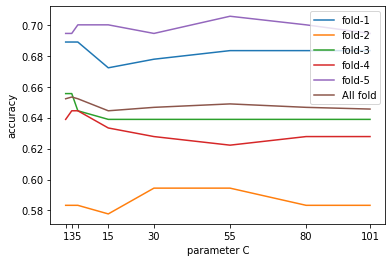

test accuracy = 0.67
max_accuracy_C = 3


In [46]:
### 문제 3-1 ###
### 코드 작성 ###
from sklearn.svm import SVC
from sklearn.model_selection import KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
C = [1, 3, 5, 15, 30, 55, 80, 101]

c_accuracy = [[] for i in range(len(C)+1)] # 각 fold 마다 C값에 따른 validation accuracy를 저장
each_fold_accuracy = [[] for i in range(len(C)+1)] # 각 fold의 validation accuracy를 저장
fold_accuracy = [] # 각 fold의 C값에 따른 accuracy를 모두 더한 뒤 평균을 낸 후, 최종적으로 해당 training model의 accuracy를 저장

kfold = KFold(n_splits = 5) # 5-fold
cnt=0 # 루프에서 현재 몇번 째 fold인지 구분하기 위한 변수

for train_idx, val_idx in kfold.split(X_train, y_train):
  X_fold_train,X_fold_val = X_train.iloc[train_idx],X_train.iloc[val_idx]
  y_fold_train,y_fold_val = y_train.iloc[train_idx],y_train.iloc[val_idx]

  for i in range(len(C)):
    svm = SVC(kernel = 'rbf', C = C[i])
    svm.fit(X_fold_train, y_fold_train)

    pred = svm.predict(X_fold_val)
    accuracy = accuracy_score(y_fold_val,pred)
   
    c_accuracy[i].append(accuracy) # C별로 구분되어 있는 리스트이므로, i번째(현재) fold의 c값에 accuracy를 저장 -> C별로 측정되는 평균 accuracy를 구하기 위함
    each_fold_accuracy[cnt].append(accuracy) # fold 별로 accuracy를 저장하는 리스트이므로, 현재 fold의 accuracy를 저장 -> 각 fold의 accuaracy 그래프를 그리기 위함

  cnt+=1 # 다음 fold로 넘어가므로 +1을 해줌

for i in range(len(C)):
  mean_accuracy = 0 # 전체 fold의 accuracy를 평균내기 위해 사용되는 변수

  for k in range(0,5):
    mean_accuracy += c_accuracy[i][k] # 각 fold의 특정 C값에서 도출되는 accuracy를 모두 더한다

  fold_accuracy.append(mean_accuracy/5) # fold의 개수만큼 나눠줘서, 현재 model의 각 C별 accracy를 구해준다

for i in range(0,5):
  plt.plot(C, each_fold_accuracy[i], label = f"fold-{i+1}")

plt.plot(C, fold_accuracy, label = "All fold") # 각 fold의 각 C값에서 도출된 accuracy의 평균이 저장되어있음
plt.xlabel('parameter C')
plt.ylabel('accuracy')
plt.legend()
plt.xticks(C)
plt.show()

svm = SVC(kernel = 'rbf', C = 3)
svm.fit(X_train, y_train)
accuracy = svm.score(X_test, y_test)

print(f"test accuracy = {accuracy}")
print(f"max_accuracy_C = {C[fold_accuracy.index(max(fold_accuracy))]}")

**설명 작성**  
- 최적의 파라미터: C = 3
- 설명: 5-fold 방식을 이용했으니, 5개의 fold의 각 validation accuracy의 평균이 해당 training model의 validation accuracy라 할 수 있다. 사실 평균 accuracy에서 파라미터 별로 accuracy 크기의 차이가 그리 크진 않지만, C = 3일 때 가장 높은 accuracy를 가지므로 C = 3를 최적의 파라미터로 설정했다.

test_accuracy = 67%

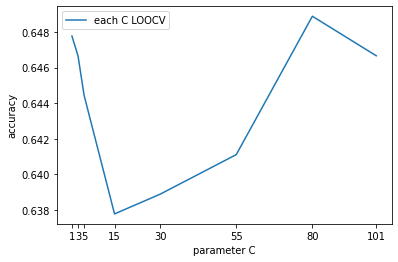

test accuracy = 0.64
max_c = 80


In [48]:
### 문제 3-2 ###
### 코드 작성 ###
from sklearn.model_selection import LeaveOneOut
C = [1, 3, 5, 15, 30, 55, 80, 101]

loocv = LeaveOneOut() # loocv
c_accuracy = []

for c in C:
  accuracy_sum = 0.0 # 각 C에서 측정되는 모든 accuracy를 더해서 저장하는 변수

  for train_idx,val_idx in loocv.split(X_train): # train data 한개한개를 모두 validation data로 사용하므로 오래걸린다
    X_cv_train, X_cv_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    svm = SVC(kernel = 'rbf', C = c)
    svm.fit(X_cv_train, y_cv_train) # 충분한 데이터로 학습시킨다

    pred = svm.predict(X_cv_val) 
    accuracy = accuracy_score(y_cv_val,pred)
    accuracy_sum += accuracy

  c_accuracy.append(accuracy_sum/len(X_train)) # 각 C에서, train data 개수만큼 accuracy를 측정했으므로 accuracy_sum에서 train data 개수로 나눔
  #print(accuracy_sum/len(X_train))

# 그래프 설정
plt.plot(C, c_accuracy, label = "each C LOOCV")
plt.xlabel('parameter C')
plt.ylabel('accuracy')
plt.legend()
plt.xticks(C)
plt.show()

svm = SVC(kernel = 'rbf', C = 80) # 최적의 parameter로 다시 model 생성
svm.fit(X_train, y_train)
accuracy = svm.score(X_test, y_test)

print(f"test accuracy = {accuracy}")
print(f"max_c = {C[c_accuracy.index(max(c_accuracy))]}")

**설명 작성**  
- 최적의 파라미터: C = 80
- 설명: 각 C별로 loocv 검증을 한 것이므로, 단순히 어떤 C에서 accuracy가 가장 높게 나왔는지 측정했다. C = 80일 때 가장 높은 accuracy가 나와서 C = 80으로 선정했다.

test accuracy = 64%

---

## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [49]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [50]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target
# target = median house value for california districts

In [51]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [52]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Adjusted R2 Score
- sklearn.metrics 패키지를 사용하여 ```def adjr2```에 Adjusted R2 Score를 구하는 함수를 작성한다.
- ```def r2```를 사용하여 ```adjr2```를 구현한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 함수 파라미터를 사용하여 구현한다.

In [53]:
from sklearn.metrics import r2_score

In [54]:
import numpy as np

def r2(actual, predicted):
    """ R2 Score """
    return r2_score(actual, predicted)

###################################
def adjr2(actual, predicted, rowcount, featurecount):
############ 문제 4-1 ##############
    """ Adjusted R2 Score """
    # 1 - ( (1-r^2)(n-1) / (n-k-1)) <<<< Adjusted R2를 구하는 공식

    n = rowcount # acutal/predicted data의 행 수
    k = featurecount # predicted data가 가지는 feature의 수
    calr2 = r2(actual, predicted) #계산된 r2 score의 값

    adjusted = 1.0 - ((1-calr2)*(n-1) / (n-k-1)) # 공식에 대입

    return adjusted

####################################
####################################

### 문제 4-2 : Feature Selection
- sklearn 패키지를 사용하여 feature selection을 수행하는 함수 ```forward_selection```을 구현한다.
- Linear Regressor 을 사용하여 feature selection이 어떻게 달라지는 지 관찰한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 변수들, 자료들을 최대한 활용하여 코드를 작성한다.

In [55]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [56]:
X = df.drop(columns=['target'])
y = df['target']
y=y.astype('int')
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [57]:
def forward_selection(X, y): # X: train data, y: train data's target
    initial_list = []
    included = list(initial_list) # 포함되어야 하는 feature
    best_r2 = 0 # 가장 높은 r2 score를 저장

    while True:

        changed = False # while 문을 빠져나가는 조건으로 활용
        excluded = list(set(X.columns)-set(included)) # included list에 없는 column names 저장하는 리스트
        new_scores = dict.fromkeys(excluded)

        for new_column in excluded:
            
            model = LinearRegression()

            ###########################################
            ###### 코드 작성 영역 외 수정 하지 말 것 #########
            ################ 문제 4-2 ##################
            #print(pd.DataFrame(X[included + [new_column]]))
            now_df = pd.DataFrame(X[included + [new_column]]) # 현재 관측 중인 dataframe << 지금까지 선택된 feature와, 후보 feature의 조합으로 이루어짐
            model.fit(now_df, y) # 위에서 선택한 df로 model을 학습시킴

            actual = y # 정답값
            predicted = model.predict(pd.DataFrame(X[included + [new_column]])) #예측값
            n = len(y) # data의 행의 개수
            k = len(included) + 1 # predicted에 쓰이는 featuer의 수(지금까지 선택된 feature의 수 + 지금 선택한 feature)

            r2_val = adjr2(pd.DataFrame(actual), pd.DataFrame(predicted), n, k) 
            
            if(r2_val > best_r2): # 만약 지금 측정한 model의 adjr2값이 이전에 측정된 가장 큰 adjr2보다 크다면
              best_r2 = r2_val 
              global col
              col = new_column # 현재 조사 중인 feature을 추가
              changed = True #변화가 생겼으므로 계속 forward 진행
            
        if not changed: # 만약 변화가 없으면(현재 model이 제일 좋으면)
              break # 더 이상 forward 안함
        else:
          included.append(col) # model에 합류된 feature list에 현재 조사 중인 feature 추가


        ##############################################
        ##############################################
 
    return included

selected_features = forward_selection(X, y)
print('selected_features:', selected_features)

selected_features: ['MedInc', 'HouseAge', 'Latitude', 'Longitude', 'AveBedrms', 'AveRooms', 'AveOccup']


### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 문제 4-1의 **forward selection을 통해 얻은 feature만**을 가진 데이터를 사용한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,1,10, 100, 1000, 10000, 100000]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [58]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import numpy as np

In [60]:
### 문제 4-3 ###
### 코드 작성 ###
X = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)
alphas = [0.0001, 0.001,0.01,0.1,1,10, 100, 1000, 10000, 100000]

ridge_r2_list = []
lasso_r2_list = []

for a in alphas: # 각 alpha에 대해 반복
  rid = Ridge(alpha = a) 
  rid.fit(X_train, y_train) # ridge model을 충분한 데이터로 학습
  
  rid_predicted = rid.predict(X_val) 
  r2_val = r2_score(y_val, rid_predicted) # r2 score값 저장
  ridge_r2_list.append(r2_val)

  #print(f"ridge : {r2_val}")

  las = Lasso(alpha = a)
  las.fit(X_train, y_train) # lasso model을 충분한 데이터로 학습
  
  las_predicted = las.predict(X_val)
  r2_val = r2_score(y_val, las_predicted) # r2 score값 저장
  lasso_r2_list.append(r2_val)

  #print(f"lasso: {r2_val}")

best_ridge_r2 = max(ridge_r2_list) 
best_ridge_idx = ridge_r2_list.index(best_ridge_r2) #r2 값이 가장 큰 ridge model의 alpha값을 찾음

best_lasso_r2 = max(lasso_r2_list)
best_lasso_idx = lasso_r2_list.index(best_lasso_r2) #r2 값이 가장 큰 lasso model의 alpha값을 찾음

print(f"ridge optimal alpha: {alphas[best_ridge_idx]}")
print(f"lasso optimal alpha: {alphas[best_lasso_idx]}")

ridge optimal alpha: 0.0001
lasso optimal alpha: 0.0001


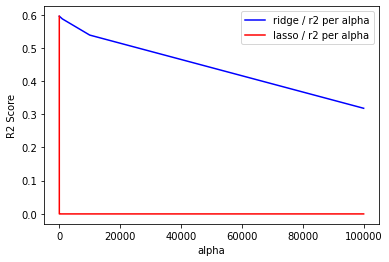

In [61]:
### 문제 4-3 ###
### 그래프 작성 ###
plt.plot(alphas, ridge_r2_list, label = "ridge / r2 per alpha", color = 'blue')
plt.plot(alphas, lasso_r2_list, label = "lasso / r2 per alpha", color = 'red')
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend() # 범례 설정
plt.show()

- Rridge regression 모델 최적의 alpha 값: 0.0001
- Lasso regression 모델 최적의 alpha 값: 0.0001

In [66]:
# 최종 결과 출력

# train data와 validation data를 합친다
train_and_val_data = pd.concat([X_train, X_val])
train_and_val_test = pd.concat([y_train, y_val])

# r2 값이 가장 높았던 alpha로 ridge model을 생성
rid = Ridge(alpha = alphas[best_ridge_idx])
rid.fit(train_and_val_data, train_and_val_test)
  
# ridge model을 이용해 예측(train / test)
rid_predicted = rid.predict(train_and_val_data)
print('ridge train data r2_score: {}'.format(r2_score(train_and_val_test, rid_predicted)))

rid_predicted = rid.predict(X_test)
print('ridge test data r2_score: {}'.format(r2_score(y_test, rid_predicted)))

# r2 값이 가장 높았던 alpha로 lasso model을 생성
las = Lasso(alpha = alphas[best_lasso_idx])
las.fit(train_and_val_data, train_and_val_test)

# lasso model을 이용해 예측(train / test)
las_predicted = las.predict(train_and_val_data)
print('\nlasso train data r2_score: {}'.format(r2_score(train_and_val_test, las_predicted)))

las_predicted = las.predict(X_test)
print('lasso test data r2_score: {}'.format(r2_score(y_test, las_predicted)))


ridge train data r2_score: 0.5757685301156126
ridge test data r2_score: 0.5918685563283452

lasso train data r2_score: 0.5757682222437639
lasso test data r2_score: 0.5918318709044917
